<a href="https://colab.research.google.com/github/Ian326/TI3001C/blob/main/AnalisisAprendizajeAutomatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidencia 2. Análisis de Aprendizaje Automático
---
***Equipo:***

**Ruth Jiménez Vázquez - A01351923**

**José Ignacio Gómez Moreno - A01067362**

**Harry Hernández Grande - A01736341**

**Ian Joab Padrón Corona - A01708940**

---

# **Entendimiento del negocio**

**Socio Formador**

TDR es un corporativo localizado en Querétaro que ofrece servicios integrales de transporte. Para ello, cuenta con modernas instalaciones, la flota de vehículos más nueva en el mercado y con un personal altamente calificado. La problemática a abordar en el reto con Transportes TDR recae en el equilibrio entre frecuencia de mantenimiento preventivo y costos operativos, optimizando el tiempo entre fallas para reducir intervenciones innecesarias y prevenir fallas críticas. Se requiere un enfoque basado en datos históricos y un análisis RCM (Reliability Centered Maintenance), que añadiría profundidad al análisis económico y el tiempo de inactividad de los tractocamiones.

La problemática a abordar se centra en la mejoría del programa de mantenimiento de la compañía, optimizando el tiempo entre fallas para reducir intervenciones innecesarias y prevenir fallas críticas. Se requiere un enfoque basado en datos históricos y un análisis RCM (Reliability Centered Maintenance), que añadiría profundidad al análisis económico y el tiempo de inactividad de los tractocamiones. Con este proyecto, el reto es lograr un ahorro del 10-15% en los costos de mantenimiento preventivo y correctivo. Esto implica el uso de métodos estadísticos descriptivos, inferenciales (causales y predictivos), y el desarrollo de un Programa de Mantenimiento Basado en Datos con Pronósticos utilizando métodos de aprendizaje estadístico y algoritmos basados en el código de trabajo de mantenimiento (Job Code Maintenance).

**Objetivo**

Analizar y predecir los costes de mantenimiento de vehículos mediante métodos estadísticos, y determinar un conjunto de hipótesis estadísticas que permitan determinar la viabilidad de un programa de mantenimiento probablemente predictivo.

**Statistical Knowledge Question**

¿Existe una relación significativa entre el tipo de unidad, su edad y la frecuencia de mantenimiento correctivo, y el número de fallas que presentan trimestralmente? Si es así, ¿cómo afectan estas fallas o mantenimientos en los costos de mantenimiento y qué estrategias podrían implementarse para reducir estos costos en un 10-15% anual?

**Objetivos de la modelación y evaluación de los datos**


*   Encontrar un patrón en las partes utilizadas en las órdenes de mantenimiento, por medio de modelos de clasificación supervisados (como Decision Trees y Support Vector Machines) para anticipar el tipo de mantenimiento que requerirá una unidad, ya sea correctivo, preventivo u otros tipos. Esto con fecha límite a la tercer semana del mes de noviembre 2024.
*   Optimización de Costos de Mantenimiento: Implementar modelos predictivos que estimen la probabilidad y frecuencia de fallas, con el fin de minimizar los costos asociados al mantenimiento correctivo, y evaluar su impacto en la compañía.

*   Aplicar técnicas de agrupamiento no supervisado (como KMeans y DBSCAN) para identificar patrones en los datos de mantenimiento y clasificar las unidades en clusters que compartan características similares, como frecuencia de fallas o tipo de uso.






# Carga de datos

In [ ]:
'''
===============================================================================
Librerias de Python a utilizar en la evidencia
===============================================================================
pandas: Libreria de manipulacion de datos en DataFrames
numpy: Libreria de manipulacion de datos en arrays o funciones matematicas
matplotlib: Libreria de visualizacion de datos a traves de graficos
seaborn: Libreria de visualizacion de datos a traves de graficos. (Extension de matplotlib)
sklearn: Libreria de machine learning
train_test_split: Dividir los datos en entrenamiento y prueba
accuracy_score: Calcular la precision de un modelo
DecisionTreeClassifier: Clasificador de arboles de decision
plot_tree: Graficar un arbol de decision
Pipeline: Crear un pipeline de procesamiento de datos
StandardScaler: Normalizar los datos
SVC: Clasificador de soporte de vectores
KMeans: Clasificador de K-Means
silhouette_score: Calcular el coeficiente de silhouette
DBSCAN: Clasificador de DBSCAN
GridSearchCV: Busqueda de hiperparametros
===============================================================================
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN

In [ ]:
# Initial data load
tdr_sayer = pd.read_csv('./data_sayer_NP.csv', low_memory=False)

# Drop undesired columns
tdr_sayer = tdr_sayer.drop(columns=['OrderID', 'UnitID', 'UnitType', 'UnitYear', 'OpenedDate', 'lagdias', 'RepReason', 'COMPLAINT', 'DESCRIPTION', 'PartUnitCost', 'CITA'])

# Rename columns
tdr_sayer = tdr_sayer.rename(columns={'laghoras': 'MTTR'})

# Preview data
tdr_sayer.head()

In [ ]:
# Convert categorical columns to numerical using cat.codes
tdr_sayer['Jobcode'] = tdr_sayer['Jobcode'].astype('category')
tdr_sayer['Jobcode'] = tdr_sayer['Jobcode'].cat.codes

tdr_sayer['JobType'] = tdr_sayer['JobType'].astype('category')
tdr_sayer['JobType'] = tdr_sayer['JobType'].cat.codes

tdr_sayer['JobTypeSummary'] = tdr_sayer['JobTypeSummary'].astype('category')
tdr_sayer['JobTypeSummary'] = tdr_sayer['JobTypeSummary'].cat.codes

tdr_sayer['TipoLinea'] = tdr_sayer['TipoLinea'].astype('category')
tdr_sayer['TipoLinea'] = tdr_sayer['TipoLinea'].cat.codes

tdr_sayer['NumParte'] = tdr_sayer['NumParte'].astype('category')
tdr_sayer['NumParte'] = tdr_sayer['NumParte'].cat.codes

# Preview data
tdr_sayer.head()

# Aprendizaje supervisado

- Genera 2 modelos de aprendizaje supervisado para los escenarios más favorables para la problemática.

- Evalua los modelos mediante algunos elementos vistos
    - matriz de confusión
    - matriz de exactitud
    - precisión
    - recall
    - F1 por clase (reporte de evaluación)
    - ROC
    - AUC

- Justificar su elección, la clase objetivo, y la métrica seleccionada para el análisis (precision vs recall), ROC, etc.

## Modelo 1: Decision Trees

In [ ]:
# Separate features (X) and target (y)
X = tdr_sayer.drop(columns=['Jobcode','JobType', 'JobTypeSummary'])
y = tdr_sayer['JobTypeSummary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
print("Training set Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing set Accuracy:", accuracy_score(y_test, y_test_pred))

In [ ]:
plt.figure(figsize=(50,25))
plot_tree(clf, feature_names=X.columns, class_names=['CORRECTIVO', 'OTROS', 'PREVENTIVO'], filled=True, rounded=True)
plt.show()

In [ ]:
features = dict(zip(X.columns, clf.feature_importances_))

# Ordenar el diccionario por valores de forma descendente
sorted_dict_desc = dict(sorted(features.items(), key=lambda item: item[1], reverse=True))
#print(sorted_dict_desc, '\n',sorted_dict_desc.keys())

fig = plt.figure(figsize=(16,5))
plt.bar(sorted_dict_desc.keys(), sorted_dict_desc.values())
plt.xlabel('Features')
plt.title('Importance of features in the Decision Tree')
plt.ylabel('Importance')
plt.show()

###Evaluación del modelo

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['CORRECTIVO', 'OTROS', 'PREVENTIVO'])
plt.title('Confusion Matrix')
plt.show()



La matriz de confusión revela que el modelo clasifica correctamente la mayoría de los ejemplos en la clase "CORRECTIVO" (349), pero muestra confusiones con otras clases. La clase "OTROS" es particularmente problemática, con muchas instancias clasificadas erróneamente como "CORRECTIVO" o "PREVENTIVO". Esto sugiere que el modelo tiene dificultades para diferenciar esta clase.

In [ ]:
from sklearn.metrics import classification_report
print("Reporte de Clasificación:\n", classification_report(y_test, y_test_pred, target_names=['CORRECTIVO', 'OTROS', 'PREVENTIVO']))

Para la clase "CORRECTIVO", el modelo obtiene una precisión de 0.65, lo que significa que el 65% de las instancias clasificadas como "CORRECTIVO" pertenecen a esta clase, esto indica que hay un número moderado de falsos positivos, pero  el modelo logra identificar correctamente la mayoría de los casos positivos cuando predice esta clase. El recall de 0.77 para esta misma clase muestra que el modelo es capaz de detectar el 77% de todas las instancias reales de "CORRECTIVO", lo cual es un buen indicador de su capacidad para abarcar la mayoría de los casos correctos en esta categoría.

Para la clase "OTROS", el desempeño es  más bajo, la precisión de 0.66 sugiere que, cuando el modelo clasifica una instancia como "OTROS", hay una probabilidad moderada de que esta predicción sea incorrecta, indicando que hay confusiones frecuentes con otras clases. El recall de 0.23 en esta clase, que implica que el modelo solo identifica correctamente el 23% de las instancias que realmente pertenecen a "OTROS". La mayoría de los casos de "OTROS" están siendo clasificados incorrectamente como "CORRECTIVO" o "PREVENTIVO".



In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_prob = clf.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=[0, 2, 1])
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {roc_auc:.2f})')

# Gráfica de la curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()



Para la clase "CORRECTIVO" (Clase 0), el modelo obtiene un AUC de 0.76, este valor sugiere un desempeño decente en la discriminación de esta clase frente a las demás, ya que el modelo es relativamente capaz de identificar correctamente los verdaderos positivos para "CORRECTIVO" mientras mantiene baja la tasa de falsos positivos, aunque no es un AUC excelente, está por encima del umbral de 0.5, lo que significa que el modelo tiene una capacidad discriminativa aceptable para esta clase.

Sin embargo, el modelo presenta un desempeño mucho menor en la clase "OTROS" (Clase 1), con un AUC de 0.42, este valor que es menor al umbral de 0.5, indica que el modelo tiene dificultades significativas para diferenciar esta clase, mostrando un comportamiento casi aleatorio en su clasificación. Un AUC tan bajo sugiere que, en lugar de identificar correctamente los verdaderos positivos de "OTROS", el modelo está generando muchos falsos positivos, confundiendo esta clase con otras.

La clase "PREVENTIVO" (Clase 2) también presenta un AUC bajo, de 0.37, esto indica que el modelo tiene problemas similares en la identificación de esta clase, con un rendimiento inferior al de un clasificador aleatorio. Esto refleja una gran dificultad para distinguir esta clase de las demás, probablemente generando una alta tasa de falsos positivos y no logrando identificar adecuadamente los verdaderos positivos.

## Modelo 2: SVM

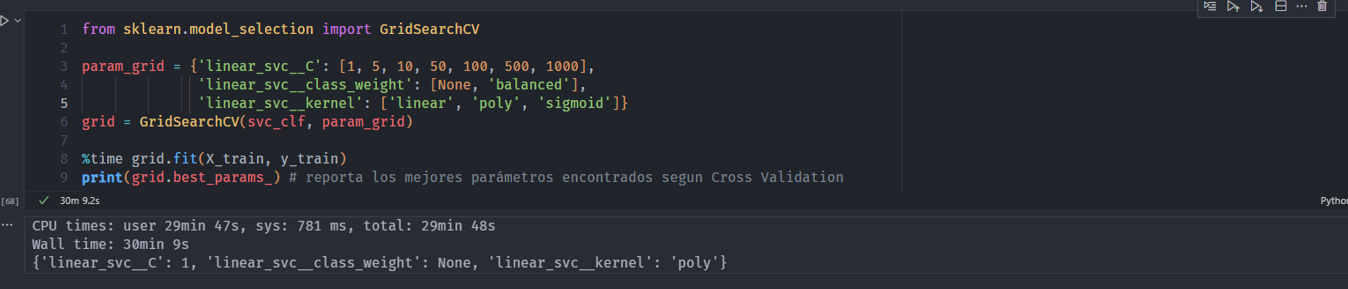

In [ ]:
X = tdr_sayer.drop(columns=['Jobcode','JobType', 'JobTypeSummary'])
y = tdr_sayer['JobTypeSummary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=32, stratify=y)

svc_clf = Pipeline([
    ('mi_scaler', StandardScaler()),
    ('linear_svc', SVC(kernel='poly', C=1, class_weight=None))
])

std_scl = StandardScaler()
svc_clf.fit(X_train, y_train) # Entrenamos

# Predicciones
y_test_pred = svc_clf.predict(X_test)
y_train_pred = svc_clf.predict(X_train)

test_acc = accuracy_score(y_test_pred, y_test)
train_acc = accuracy_score(y_train_pred, y_train)
print('% de aciertos sobre el set de PRUEBA: ', round(test_acc*100, 3))
print('% de aciertos sobre el set de ENTRENAMIENTO: ', round(train_acc*100, 3))

### Evaluación del modelo

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['CORRECTIVO', 'OTROS', 'PREVENTIVO'])
plt.title('Confusion Matrix')
plt.show()


El modelo realiza un trabajo relativamente adecuado, identificando correctamente 307 instancias, sin embargo, también muestra una confusión considerable, con 142 instancias clasificadas incorrectamente como "PREVENTIVO", por lo que se observa que tiende a confundirla con la clase  "PREVENTIVO".

En el caso de la clase "OTROS", el modelo presenta un desempeño deficiente, clasificando correctamente solo 45 instancias, mientras que 53 se confunden con la clase "CORRECTIVO" y 3 con "PREVENTIVO". Esta alta tasa de confusión indica que el modelo tiene dificultades para reconocer la clase "OTROS", lo que podría deberse a que las características de esta clase no se diferencian bien de las otras, y mas con la clase de "CORRECTIVO".

Para la clase "PREVENTIVO", el modelo identifica correctamente 208 instancias, pero clasifica erróneamente 133 como "CORRECTIVO", esta confusión  entre "CORRECTIVO" y "PREVENTIVO" sugiere que el modelo no puede distinguir completamente entre estas dos clases.

In [ ]:
print("Reporte de Clasificación:\n", classification_report(y_test, y_test_pred, target_names=['CORRECTIVO', 'OTROS', 'PREVENTIVO']))

Para la clase "CORRECTIVO", el modelo obtiene una precisión de 0.62 y un recall de 0.68, esto indica que el 62% de las instancias clasificadas como "CORRECTIVO"  pertenecen a esta clase, mientras que el modelo logra detectar correctamente el 68% de todas las instancias reales de "CORRECTIVO". El F1-score de 0.65 no dice de un rendimiento aceptable, aunque mejorable, en esta clase.

En la clase "OTROS", el desempeño del modelo es bastante bajo, ya que la precisión es de 0.60, lo cual indica que, aunque el modelo tiene cierta precisión cuando clasifica algo como "OTROS", el recall es extremadamente bajo, solo 0.03, demanera que el modelo solo identifica correctamente el 3% de todas las instancias reales de la clase "OTROS", omitiendo la gran mayoría de ellas. El F1-score de 0.06 es muy bajo, reflejando la incapacidad del modelo para reconocer instancias de esta clase.

Para la clase "PREVENTIVO", la precisión es de 0.53, y el recall es de 0.61, lo que significa que el modelo clasifica correctamente el 61% de las instancias reales de esta clase. El F1-score de 0.57 dice que el modelo tiene un rendimiento aceptable en "PREVENTIVO".

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


y_test_decision = svc_clf.decision_function(X_test)


y_test_bin = label_binarize(y_test, classes=[0, 2, 1])
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_decision[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {roc_auc:.2f})')

# Gráfica de la curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Para la clase "CORRECTIVO" (Clase 0), el AUC es 0.66, tiene un desempeño moderado en la capacidad del modelo para distinguir correctamente las instancias de esta clase. Aunque todavía existe margen de mejora, ya que el AUC no se acerca a 1.0.

En la clase "OTROS" (Clase 1), el AUC es de solo 0.47, lo cual está por debajo del umbral de 0.5, que corresponde al desempeño de un modelo aleatorio, para este caso el modelo tiene dificultades para identificar correctamente las instancias de esta clase y, se comporta de manera casi aleatoria al clasificar "OTROS".

Para la clase "PREVENTIVO" (Clase 2), el AUC es de 0.48, también cerca de lo aleatorio, el modelo tiene una capacidad de discriminación mínima para esta clase y que, al igual que con la clase "OTROS", podría estar confundiendo las instancias de "PREVENTIVO" con otras clases.

##Elección del mejor modelo


Entre los dos modelos evaluados, el Decision Tree y el SVC , el Decision Tree demuestra un mejor desempeño general, observando las métricas clave de precisión, recall y F1-score, el Decision Tree supera al SVC en todas las clases, en el caso de la clase "CORRECTIVO", el Decision Tree muestra un F1-score de 0.71 frente a 0.65 del SVC, lo cual indica una mejor capacidad para equilibrar precisión y recall en esta clase. Aunque ambos modelos presentan problemas al clasificar la clase "OTROS", el Decision Tree logra un F1-score ligeramente superior, reflejando una mejor identificación de instancias en esta categoría.

En cunato al AUC de la curva ROC, el Decision Tree también muestra un rendimiento superior, en especifico en la clase "CORRECTIVO" con un AUC de 0.76 en comparación al 0.66 del SVC. Aunque ambos modelos tienen dificultades para distinguir correctamente las clases "OTROS" y "PREVENTIVO", el AUC del Decision Tree sigue siendo superior.

Finalmente, el Decision Tree es más fácil de interpretar y ajustar, ya que su estructura de reglas de decisión permite una visualización clara de cómo el modelo clasifica las instancias, lo que facilita la identificación de posibles mejoras en las características a considerar y por el contrario, el SVC con es menos interpretable y requiere un ajuste de hiperparámetros más complejo.

# Aprendizaje no supervisado

- Genera 2 modelos de aprendizaje supervisado para los escenarios más favorables para la problemática.

- Evalua los modelos mediante índices de validación de clusters y/o inspección manual.

## Modelo 1: KMeans

In [ ]:
X = tdr_sayer.drop(columns=['Jobcode','JobType', 'JobTypeSummary'])

inertias = []

# Calculo de la inercia para diferentes numeros de clusters
for k in range(1, 21):
  km = KMeans(n_clusters=k, init='k-means++') # Creamos el modelo
  km.fit(X) # Ajuste a sus parámetros con respecto a X (aprendizaje)
  inertias.append(km.inertia_)

# Grafica de las inercias: suma de distancias al cuadrado entre instancias
# y su centroide asignado
plt.plot(range(1,21), inertias)

# Informacion del grafico
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.xticks(range(1,21))
plt.grid(axis='x', linestyle='--')

# Numero de clusters mas optimo, antes de que la inercia deje de disminuir
plt.axvline(4, color='b', linestyle='--')

plt.show()

km = KMeans(n_clusters=5, init='k-means++') # Creamos el modelo
y_kmeans = km.fit_predict(X) # Ajuste a sus parámetros con respecto a X (aprendizaje)

In [ ]:
X = tdr_sayer.drop(columns=['Jobcode','JobType', 'JobTypeSummary'])

silhouettes = []

# Calculo de los coeficientes de silueta para diferentes numeros de clusters
for k in range(2, 21):
  km = KMeans(n_clusters=k, init='k-means++') # Creamos el modelo
  km.fit(X) # Ajuste a sus parámetros con respecto a X (aprendizaje)
  silhouettes.append(silhouette_score(X, km.labels_))

# Grafica de las inercias: suma de distancias al cuadrado entre instancias
# y su centroide asignado
plt.plot(range(2,21), silhouettes)
plt.title('Silhouette scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.xticks(range(2,21))
plt.grid(axis='x', linestyle='--')

# Numero de clusters mas optimo, antes de que el coeficiente de silueta deje de disminuir
plt.axvline(2, color='k', linestyle='--')

plt.show()

Como podemos observar, el numero más adecuado de clusters se encuentra entre 2 y 4 considerando ambas gráficas, tanto la del silhuette score como la del método del codo. Para tener un modelo lo más equilibrado posible, se tomó la decisión de separar la información en ***3 clústers distintos.***

In [ ]:
km = KMeans(n_clusters=3, init='k-means++')
y_kmeans = km.fit_predict(X)

print(f'El score de silhouette con k={3} clusters es de: {silhouette_score(X, km.labels_):.2f}')

## Modelo 2: DBSCAN

In [ ]:
# Obtener una forma de calcular el mejor epsilon y min_samples para DBSCAN a partir de un rango de distancias dadas por
# KMeans y el coeficiente de silueta

# X = tdr_sayer.drop(columns=['Jobcode','JobType', 'JobTypeSummary'])

# epsilons = np.arange(2500, 2900)
# min_s = np.arange(5,11)

# best_sill, b_eps, b_ns = -1.0, 0, 0
# for e in epsilons: # Exploracion de epsilons
#   for m in min_s: # Exploracion de min_samples
#     dbscan = DBSCAN(eps=e, min_samples=m)
#     dbscan.fit(X)
#     try:
#       sil_sc = silhouette_score(X, dbscan.labels_)
#       if(sil_sc > best_sill):
#         best_sill, b_eps, b_ns = sil_sc, e, m
#     except:
#       print('No se puede calcular score!')

# print('Mejor conjunto de hiperparametros es:\n',
#       'Silhouette score: ', round(best_sill, 3),
#             '\tEpsilon: ', b_eps,
#             '\tMin_samples: ', b_ns)

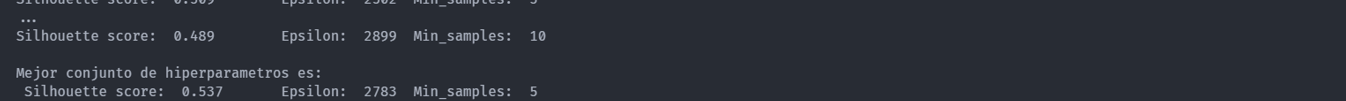

In [ ]:
# epsilon-vecindad, numero de puntos
dbscan = DBSCAN(eps=2783, min_samples=5)
dbscan.fit_predict(X)
print(f'El score de silhouette con e={2783} y min_samples={5} es de: {silhouette_score(X, dbscan.labels_):.2f}')

## Índices de validación

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans_silhouette = silhouette_score(X, kmeans.labels_)
print(f"KMeans Silhouette Score: {kmeans_silhouette:.2f}")

from sklearn.metrics import davies_bouldin_score

kmeans_davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
dbscan_davies_bouldin = davies_bouldin_score(X, dbscan.labels_)

print(f"KMeans Davies-Bouldin Index: {kmeans_davies_bouldin:.2f}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_davies_bouldin:.2f}")

from sklearn.metrics import calinski_harabasz_score

kmeans_calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
dbscan_calinski_harabasz = calinski_harabasz_score(X, dbscan.labels_)

print(f"KMeans Calinski-Harabasz Index: {kmeans_calinski_harabasz:.2f}")
print(f"DBSCAN Calinski-Harabasz Index: {dbscan_calinski_harabasz:.2f}")

De acuerdo a nuestros índices de validación de clusters, podemos determinar que el mejor modelo sería el de KMeans. Ya que en cuanto al índice de Davies-Bouldin, es menor que el del modelo de DBSCAN, lo que indica que el agrupamiento es mejor, así como la separación de los clusters. Y para el índice Calinski-Harabasz tambien podremos determinar que el modelo de KMeans es mejor, ya que en este índice, dicho modelo es mas alto, lo que indica de igual manera, una mejor definición de los clusters.

# **CONCLUSIONES**
El análisis realizado con distintos modelos de aprendizaje automático, ha permitido identificar patrones y realizar predicciones sobre las necesidades de mantenimiento de la flota de TDR. Los modelos de clasificación, como los árboles de decisión y máquinas de soporte vectorial, demostraron ser efectivos para predecir el tipo de mantenimiento requerido, con un rendimiento destacado en la clase "Correctivo". Sin embargo, algunas clases presentaron desafíos en la precisión, como la categoría "Otros", indicando posibles áreas de mejora en el balanceo de clases o el uso de datos adicionales.

Por otro lado, el uso de técnicas de agrupamiento, específicamente KMeans y DBSCAN, permitió segmentar las unidades en grupos según características de mantenimiento y frecuencia de fallas, siendo KMeans el modelo que mostró una mejor definición de clusters de acuerdo con los índices de validación. Estas segmentaciones pueden ayudar a TDR a diseñar estrategias de mantenimiento más personalizadas y optimizar recursos.

En conjunto, los resultados de estos modelos respaldan el potencial de reducir en un 10-15% los costos de mantenimiento correctivo y preventivo, impactando así positivamente en la eficiencia operativa y financiera de la empresa.

- Incluyan justificación del cómo es que demuestran que están cumpliendo con las competencias.

| Subcompetencia                                 | Grados de logro  |                                |                               |                                |
|------------------------------------------------|------------------|--------------------------------|-------------------------------|--------------------------------|
|                                                | Destacado        | Sólido                         | Básico                        | Incipiente                     |
| SEG0702 Tecnologías de vanguardia              | Evalúa de forma integral las tecnologías de información apropiadas, a partir de seleccionar estratégicamente las opciones idóneas para añadir un valor sustancial a su práctica profesional. | Evalúa de forma correcta las tecnologías de información, a partir de seleccionar apropiadamente las opciones adecuadas para añadir un valor conveniente a su práctica profesional. | Evalúa de forma parcial las tecnologías de información, a partir de seleccionar de manera aceptable las opciones elementales para añadir un valor suficiente a su práctica profesional. | Evalúa en forma incorrecta las tecnologías de información, a partir de seleccionarlas de manera inapropiada, sin añadir valor a su práctica profesional. |


### **Conclusiones individuales**

---
*   ***Ruth Jiménez Vázquez***

Durante el trabajo realizado en este periodo, he logrado adquirir un aprendizaje significativo en el uso de tecnologías de vanguardia utilizando ciencia de datos para crear los modelos predictivos de machine learning. El utilizar técnicas como Decision Trees, Support Vector Machines, KMeans y DBSCAN, me ha permitido no sólo resolver problemas específicos de mantenimiento en la flota de TDR, sino también identificar las soluciones más efectivas para optimizar los costos y reducir la frecuencia de fallas en los equipos.

El proceso de evaluación y comparación de los modelos refleja una comprensión integral de las herramientas tecnológicas. Considero que este trabajo ha abonado positivamente a mi desarrollo profesional, al fortalecer las habilidades de uso de tecnologías de información que aporten valor operativo y promuevan el pensamiento crítico. Resulta crucial para generarle valor a la empresa TDR por medio de los modelos de mejora, impulsando la innovación en el manejo de grandes volúmenes de datos en la industria del transporte, además de siempre seguir metodologías de organización y administración de datos como CRISP y generar objetivos SMART.

---
*   ***José Ignacio Gómez Moreno***
---
*   ***Harry Hernández Grande***

En conclusión, he adquirido conocimientos significativos en el uso de herramientas y técnicas avanzadas de ciencia de datos aplicadas a la creación de modelos de machine learning, como lo son el Decision Trees y Support Vector Machines, así como métodos de clustering como KMeans y DBSCAN, esto me ha ayudado a resolver problemas específicos relacionados con el mantenimiento y la optimización de costos en la flota de TDR, logrando asi explorar las soluciones que generan un mayor impacto en la reducción de fallas y el ahorro operativo.

La experiencia de evaluar y comparar diferentes modelos me ha dado una manera de cómo seleccionar y ajustar las mejores herramientas tecnológicas para cada situación, eligiendo el mejor modelo que se adapte al problema que se esta resolviendo.

Este proceso me ha permitido consolidar mis habilidades en el manejo de dataframes en pandas para la manipulación de datos y sklearn para el desarrollo de modelos predictivos.

---
*   ***Ian Joab Padrón Corona***

A lo largo de este periodo, me he familiarizado y refinado mis habilidades en el uso de diversas librerías basadas en Python. Dichas herramientas me han permitido definir un buen acercamiento al desarrollo de una solución para la problemática que tenemos entre manos mi equipo, junto con nuestros socio formadores (TDR). Entre algunas de las librerías más destacables en cuestión al desarrollo del proyecto se encuentran pandas, para el manejo de los datos proporcionados y su correcta manipulación, algunas herramientas de visualización como pandas y seaborn y sobretodo la librería de sklearn, con su inmenso repertorio de métodos de analítica.

No solo eso, sino que mediante el aprendizaje y puesta en práctica de modelos de aprendizaje supervisado y no supervisado como lo son los DecisionTrees, SupportVectorMachines, algoritmos de clasificacion por algoritmos como KMeans o DBScan, es posible predecir con antelación el tipo de mantenimiento a darle a una unidad de la flota de TDR - Sayer Full, o poder categorizarlas, inclusive llegando a mejorar el programa de mantenimiento que se utiliza actualmente.

Con todo esto en cuenta, considero que ahora soy capaz de evaluar el contexto en el que se encuentran diferentes proyectos de esta índole. Permitiéndome así, elegir las mejores opciones para darle un análisis adecuado a través de una metodología de trabajo CRISP.

---




